# Brazilian Ecommerce Olist 

In [2]:
#loading necessary packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [142]:
customer_data = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
product_category_name_translation = pd.read_csv('product_category_name_translation.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')



In [4]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


## Preprocessing

In [5]:
# Remove duplicates from order_items DataFrame
has_duplicates = order_items['order_id'].duplicated().sum()
order_items = order_items.drop_duplicates(subset='order_id', keep='first')


# Remove duplicates from order_reviews DataFrame
has_duplicates = order_reviews['order_id'].duplicated().sum()
order_reviews = order_reviews.drop_duplicates(subset='order_id', keep='first')


# Remove duplicates from order_payments DataFrame
has_duplicates = order_payments['order_id'].duplicated().sum()
order_payments = order_payments.drop_duplicates(subset='order_id', keep='first')



# Remove duplicates from delivery DataFrame
#has_duplicates = delivery['order_id'].duplicated().sum()
#delivery = delivery.drop_duplicates(subset='order_id', keep='first')

# Remove duplicates from products DataFrame (assuming product_id is the unique identifier)
has_duplicates = products['product_id'].duplicated().sum()
products = products.drop_duplicates(subset='product_id', keep='first')



In [6]:
#Convert to date time object 


orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date '] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [7]:
#removing null that doesnt add value from the dataset 

#orders.isnull().sum()
#customer_data.isnull().sum() #0 NULL
#geolocation.isnull().sum() #0 NULL
#order_items.isnull().sum() #0 NULL
#order_payments.isnull().sum() #0 NULL
#products.isnull().sum() #610 NULL that should be removed 
#sellers.isnull().sum() #0 NULL
#product_category_name_translation.isnull().sum() #0 NULL 
#order_reviews.isnull().sum() #Keep NULLS, only remove nulls before the necessary analysis 

products = products.dropna()


null_counts = products.isnull().sum()
print(null_counts)
# Remove rows with null values in the DataFrame


product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


## Exploratory Data Analysis

### Exploring Reviews: Orders that do not have an delivered customer date. 

**From the missing "order_approved_at", "order_delivered_customer_data", and "order_Delivered_carrier_data" how many gave a review that is bad from the order_reviews dataset?**

**From those who give a 1 review, how many of those are from the people who do not receive the products?**


These are the reviews of people who have placed an order and never recieved.

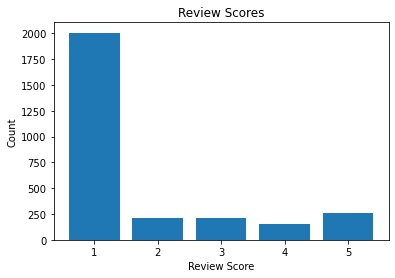

1    11353
2     3133
3     8124
4    19044
5    57019
Name: review_score, dtype: int64
1.0    2006
2.0     210
3.0     215
4.0     151
5.0     261
Name: review_score, dtype: int64
17.65  % of 1 reviews are from those who never received their package, nothing significant enough to look into


In [8]:
NULL_orders = orders[orders['order_delivered_customer_date'].isnull()]

# Optional: Reset the index of the new dataset
NULL_orders = NULL_orders.reset_index(drop=True)


#print(NULL_orders)

merged_data = pd.merge(NULL_orders, order_reviews, on='order_id', how='left')

# Print the merged dataset
#print(merged_data)

merged_data.isnull().sum() 


review_scores_count_NULL = merged_data['review_score'].value_counts()

# Sort the review scores in ascending order
review_scores_count_NULL = review_scores_count_NULL.sort_index()

# Create a bar chart
plt.bar(review_scores_count_NULL.index, review_scores_count_NULL.values)

# Set the chart title and axis labels
plt.title('Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')

# Display the chart
plt.show()

review_scores_count_NULL = merged_data['review_score'].value_counts()
review_scores_count_NULL = review_scores_count_NULL.sort_index()

review_scores_count = order_reviews['review_score'].value_counts()
review_scores_count = review_scores_count.sort_index()

print(review_scores_count)
print(review_scores_count_NULL)

print(round(2016/11424*100, 2)," % of 1 reviews are from those who never received their package, nothing significant enough to look into") 

**Are most comments positive or negative sentiment?**

People are most likely to leave messages when they have a bad review, thus I can forsee if we were to do an NLP, the sentiments will most likely be negative.

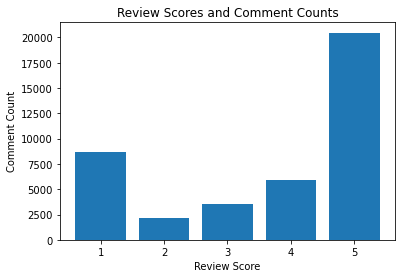

In [9]:
merged_data_total = pd.merge(orders, order_reviews, on='order_id', how='left')

review_scores_count = merged_data_total.groupby('review_score')['review_comment_message'].count()

# Reindex the data to include all possible review scores from 1 to 5
review_scores_count = review_scores_count.reindex(range(1, 6), fill_value=0)

# Create a bar chart
plt.bar(review_scores_count.index, review_scores_count.values)

# Set the chart title and axis labels
plt.title('Review Scores and Comment Counts')
plt.xlabel('Review Score')
plt.ylabel('Comment Count')

# Display the chart
plt.show()

### Exploring Reviews: Timeliness of delivery.

**Does the lag time between when a customer orders the product and when they receive it effect the review?**
- First do a general EDA, if have time, can use statistical model to prove

In [10]:
feature_engine = pd.DataFrame()

columns_to_add = ['order_id', 'order_purchase_timestamp', 'order_delivered_customer_date']  # Replace with actual column names

# Assign the columns from 'orders' to 'feature_engine'
feature_engine[columns_to_add] = orders[columns_to_add]


feature_engine['days_delivered_time'] = feature_engine.apply(lambda row: 
np.abs(pd.to_datetime(row['order_purchase_timestamp']).day - pd.to_datetime(row['order_delivered_customer_date']).day),axis=1)


In [11]:
#the amount of days it took to send the product 

#display(feature_engine)

merged_data_2 = pd.merge(feature_engine, order_reviews, on='order_id', how='left')

display(merged_data_2)



# Assuming you have a DataFrame called df
#merged_data_2.to_csv('days_delivered.csv', index=False)

,order_id,order_purchase_timestamp,order_delivered_customer_date,days_delivered_time,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-10 21:25:13,8.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-08-07 15:27:45,17.0,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-17 18:06:29,9.0,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-12-02 00:28:42,16.0,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-16 18:17:02,3.0,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51
...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,2017-03-17 15:08:01,8.0,e262b3f92d1ce917aa412a9406cf61a6,5.0,NaN,NaN,2017-03-22 00:00:00,2017-03-23 11:02:08
99437,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,2018-02-28 17:37:56,22.0,29bb71b2760d0f876dfa178a76bc4734,4.0,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01
99438,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,2017-09-21 11:24:17,6.0,371579771219f6db2d830d50805977bb,5.0,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57
99439,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,2018-01-25 23:32:54,17.0,8ab6855b9fe9b812cd03a480a25058a1,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56


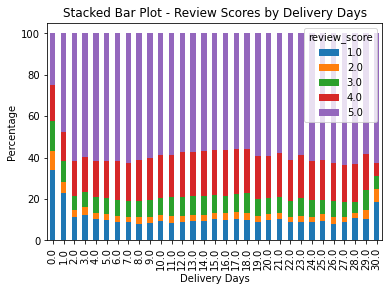

NameError: name 'LR_merged_data_2' is not defined

In [12]:
# Assuming you have a DataFrame called 'merged_data_2' with columns 'days_delivered_time' and 'review_score'

# Group the data by 'days_delivered_time' and 'review_score' and calculate the count
grouped_data = merged_data_2.groupby(['days_delivered_time', 'review_score']).size().unstack()

# Calculate the percentage for each review score within each delivery day
grouped_data_percent = grouped_data.apply(lambda x: x / x.sum() * 100, axis=1)

# Plot the stacked bar plot
grouped_data_percent.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Delivery Days')
plt.ylabel('Percentage')
plt.title('Stacked Bar Plot - Review Scores by Delivery Days')

# Show the plot
plt.show()

grouped_data_percent.head()


################ Statistical Modelling ####################

#import statsmodels.api as sm


# Filter out rows where 'days_delivered_time' is not equal to 0
#LR_merged_data_2 = merged_data_2[merged_data_2['days_delivered_time'] != 0]
#LR_merged_data_2.dropna()


#print(LR_merged_data_2['days_delivered_time'].value_counts())

print(LR_merged_data_2['review_score'].value_counts())
     
# Extract the data for regression
#X = LR_merged_data_2['review_score']
#y = LR_merged_data_2['days_delivered_time']

#X = X[np.isfinite(X) & np.isfinite(y)]
#y = y[np.isfinite(X) & np.isfinite(y)]


# Add a constant to X
#X = sm.add_constant(X)

# Fit the regression model
#model = sm.OLS(y, X)
#results = model.fit()

# Print the regression results
#print(results.summary())

 

### Exploring Time Related Factors 

**At what hour do most people buy their products?**

## **Feature Engineering**

## TD-IDF

In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /Users/jaja/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Preprocessing for TD-IDF**

In [14]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [104]:
swords = set().union(stopwords.words('portuguese'))


order_reviews_2 = order_reviews.copy()
#replace all signs and stopwords in tweets and tokenize tweets (tokenization means splitting up a larger body of text into pieces such as words, keywords, phrases, symbols and other elements called tokens; in our case we can split the tweets into words)

order_reviews_2.drop_duplicates(subset='review_comment_message',inplace=True)
order_reviews_2 = order_reviews_2[order_reviews_2['review_comment_message'].notnull()]
order_reviews_2.shape



order_reviews_2['processed_text'] = order_reviews_2['review_comment_message'].str.lower()


order_reviews_2['processed_text'] = order_reviews_2['review_comment_message'].str.replace('(@[a-z0-9]+)\w+',' ')
order_reviews_2['processed_text'] = order_reviews_2['review_comment_message'].str.replace('(http\S+)', ' ')
order_reviews_2['processed_text'] = order_reviews_2['review_comment_message'].str.replace('([^0-9a-z \t])',' ')
order_reviews_2['processed_text'] = order_reviews_2['review_comment_message'].str.replace(' +',' ')
order_reviews_2['processed_text'] = order_reviews_2['processed_text'].str.replace('/', ' ')  # Remove slashes
order_reviews_2['processed_text'] = order_reviews_2['processed_text'].str.replace('.', ' ')  # Remove dots
order_reviews_2['processed_text'] = order_reviews_2['processed_text'].str.replace('\\', ' ')



order_reviews_2['processed_text'] = order_reviews_2['processed_text'].apply(lambda x: [i for i in x.split() if not i in swords])




order_reviews_2

/var/folders/h2/ldzmdwfn22q_73r1s_6dw5900000gn/T/ipykernel_40437/2199017502.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  order_reviews_2['processed_text'] = order_reviews_2['review_comment_message'].str.replace('(@[a-z0-9]+)\w+',' ')
/var/folders/h2/ldzmdwfn22q_73r1s_6dw5900000gn/T/ipykernel_40437/2199017502.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  order_reviews_2['processed_text'] = order_reviews_2['review_comment_message'].str.replace('(http\S+)', ' ')
/var/folders/h2/ldzmdwfn22q_73r1s_6dw5900000gn/T/ipykernel_40437/2199017502.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  order_reviews_2['processed_text'] = order_reviews_2['review_comment_message'].str.replace('([^0-9a-z \t])',' ')
/var/folders/h2/ldzmdwfn22q_73r1s_6dw5900000gn/T/ipykernel_40437/2199017502.py:19: FutureWarning: The default value of regex will 

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,processed_text
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,"[Recebi, bem, antes, prazo, estipulado]"
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,"[Parabéns, lojas, lannister, adorei, comprar, ..."
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47,"[aparelho, eficiente, site, marca, aparelho, i..."
12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22,"[Mas, pouco, ,travando, valor, ta, Boa]"
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01,"[Vendedor, confiável,, produto, ok, entrega, a..."
...,...,...,...,...,...,...,...,...
99205,98fffa80dc9acbde7388bef1600f3b15,d398e9c82363c12527f71801bf0e6100,4,NaN,para este produto recebi de acordo com a compr...,2017-11-29 00:00:00,2017-11-30 15:52:51,"[produto, recebi, acordo, compra, realizada!]"
99208,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5,NaN,Entregou dentro do prazo. O produto chegou em ...,2018-02-07 00:00:00,2018-02-19 19:47:23,"[Entregou, dentro, prazo, O, produto, chegou, ..."
99215,a709d176f59bc3af77f4149c96bae357,d5cb12269711bd1eaf7eed8fd32a7c95,3,NaN,"O produto não foi enviado com NF, não existe v...",2018-05-19 00:00:00,2018-05-20 21:51:06,"[O, produto, enviado, NF,, existe, venda, NF,,..."
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,"[Excelente, mochila,, entrega, super, rápida, ..."


In [105]:
order_reviews_2.head()

print(order_reviews_2['processed_text'])


3                  [Recebi, bem, antes, prazo, estipulado]
4        [Parabéns, lojas, lannister, adorei, comprar, ...
9        [aparelho, eficiente, site, marca, aparelho, i...
12                 [Mas, pouco, ,travando, valor, ta, Boa]
15       [Vendedor, confiável,, produto, ok, entrega, a...
                               ...                        
99205        [produto, recebi, acordo, compra, realizada!]
99208    [Entregou, dentro, prazo, O, produto, chegou, ...
99215    [O, produto, enviado, NF,, existe, venda, NF,,...
99221    [Excelente, mochila,, entrega, super, rápida, ...
99223    [produto, chegou, ja, devolver,, pois, defeito...
Name: processed_text, Length: 36086, dtype: object


In [106]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

order_reviews_2['stemmed'] = order_reviews_2['processed_text'].apply(lambda x: [ps.stem(i) for i in x if i != ''])

order_reviews_2['stemmed'].head(n=20)

print(order_reviews_2['stemmed'][9])


['aparelho', 'eficient', 'site', 'marca', 'aparelho', 'impresso', '3desinfector', 'chegar', 'outro', 'nome', 'atualizar', 'marca', 'correta', 'vez', 'aparelho']


In [107]:
from nltk.tokenize import word_tokenize

# Preprocessing the text data - Step 1
def preprocess_text(review):
    review_text = ' '.join(review)  # Join the words into a single string
    return [i.lower() for i in word_tokenize(review_text) if i.isalpha()]

# Preprocessing the text data - Step 2
def build_vocabulary(sentences):
    word_set = set()
    for sentence in sentences:
        word_set.update(sentence)
    return word_set

# Preprocessing the text data - Step 3
def create_index_dict(word_set):
    index_dict = {}
    for i, word in enumerate(word_set):
        index_dict[word] = i
    return index_dict

# Main code
sentences = []

# Step 1: Preprocess each review and collect sentences
for review in order_reviews_2['stemmed']:
    preprocessed_sentence = preprocess_text(review)
    sentences.append(preprocessed_sentence)

# Step 2: Build the vocabulary from the collected sentences
word_set = build_vocabulary(sentences)

# Step 3: Create the index dictionary for the vocabulary
index_dict = create_index_dict(word_set)

# Print summary or desired information from each step
print("Processed sentences:")
for sentence in sentences[:5]:
    print(sentence)



Processed sentences:
['recebi', 'bem', 'ant', 'prazo', 'estipulado']
['parabén', 'loja', 'lannist', 'adorei', 'comprar', 'internet', 'seguro', 'prático', 'parabén', 'todo', 'feliz', 'páscoa']
['aparelho', 'eficient', 'site', 'marca', 'aparelho', 'impresso', 'chegar', 'outro', 'nome', 'atualizar', 'marca', 'correta', 'vez', 'aparelho']
['ma', 'pouco', 'travando', 'valor', 'ta', 'boa']
['vendedor', 'confiável', 'produto', 'ok', 'entrega', 'ant', 'prazo']


In [19]:
print("Vocabulary size:", len(word_set))
#print("Index dictionary:", index_dict)

#Term Frequency
def termfreq(document, word):
    N = len(document)
    occurance = len([token for token in document if token == word])
    return occurance/N


 
def inverse_doc_freq(word):
    try:
        word_occurance = word_count[word] + 1
    except:
        word_occurance = 1
    return np.log(total_documents/word_occurance)

def tf_idf(sentence):
    tf_idf_vec = np.zeros((len(word_set),))
    for word in sentence:
        tf = termfreq(sentence,word)
        idf = inverse_doc_freq(word)
         
        value = tf*idf*100
        tf_idf_vec[index_dict[word]] = value 
    return tf_idf_vec


Vocabulary size: 14201


In [20]:
vectors = []
for sent in sentences:
    vec = tf_idf(sent)
    vectors.append(vec)
 
print(vectors[0])

NameError: name 'total_documents' is not defined

**RFM Model**

Recency: 
Days since last order

In [21]:
import matplotlib.pyplot as plt

# Retrieve non-zero elements from the array
non_zero_elements = vectors[1][vectors[1] != 0]

# Plot the histogram
plt.hist(non_zero_elements, bins=10)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Non-Zero Values')
plt.xlim(80, 100)
plt.ylim(0, 10)
plt.show()




IndexError: list index out of range

In [22]:

data = []
for sentence, order_id in zip(sentences, order_reviews_2['order_id']):
    data.append({'order_id': order_id, 'text_data': sentence})

text_data = pd.DataFrame(data)




In [24]:
output_df = pd.DataFrame(columns=['order_id'] + list(index_dict.keys()))

for index, row in order_reviews_2.iterrows():
    review = row['stemmed']
    if isinstance(review, float):  # Check if the value is a float
        review = str(review)  # Convert the float to a string
    if isinstance(review, str):  # Check if the value is a string
        tf_idf_vec = tf_idf(review)
        output_df.loc[index] = [row['order_id']] + list(tf_idf_vec)


output_df = output_df.reset_index(drop=True)


NameError: name 'total_documents' is not defined

In [320]:
IDF_text = output_df

IDF_text.head()

,order_id,consideraçao,cigarro,preparava,acrescentar,futuramente,ollist,indignado,localização,sertõ,...,agradaram,cuando,fita,hastes,escuro,respeitoso,franc,indignada,nei,amora
3,658677c97b385a9be170737859d3511b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8e6bfb81e283fa7e4f11123a3fb894f1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,b9bf720beb4ab3728760088589c62129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,9d6f15f95d01e79bd1349cc208361f09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,e51478e7e277a83743b6f9991dbfa3fb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## SENTIMENT ANALYSIS

In [27]:
#!pip install deep-translator
!pip uninstall vaderSentiment
!pip install vader-multi



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: pip install --upgrade pip


In [49]:
import vaderSentiment.vaderSentiment as vdd

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [103]:
# Assuming you have already defined the 'analyzer' object
from nltk.tokenize import word_tokenize




In [ ]:
Actually maybe what i can do is after i predicted the categories, i can also show how we can use text of what people leave as messages to predict which group they are more likely to be in, this can be a way to track the poeple via the comments and put them into categoreis 

In [100]:
#COMPUTING SENTIMENT SCORES USING NLTK - VADER LIBRARY:

import nltk.sentiment.vader as vd
from nltk import download
download('vader_lexicon')

import nltk
nltk.download('punkt')




[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jaja/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jaja/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [311]:
subsamp = order_reviews_2.sample(n=5000, random_state=42)

# If you want to reset the index of the subsample DataFrame
subsamp.reset_index(drop=True, inplace=True)

# Now you have 5000 random observations in the subsamp DataFrame


In [62]:
#!pip install -U deep-translator


from deep_translator import GoogleTranslator as GT



In [ ]:
order_reviews_2.head()

## RFM Model (Many are duplicated please fix)


Creating a dataset that will be used to manipulate RFM, must include order_id, product_id, order_status

**Recency: how recently a customer has made a purchase**
<br>
= orders['order_purchase_timestamp'].max - orders['order_purchase_timestamp']  
<br> 

**Frequency: how often a customer makes a purchase**
<br> 
= Order_items['order_item_id']
<br>

**Monetary**
<br> 
= order_payments['payment_value']

In [116]:
RFM_df = []
merged_data = []
RFM = []

merged_data = pd.merge(orders, order_items[['order_id', 'order_item_id']], on='order_id', how='inner')

RFM = pd.merge(merged_data, order_payments[['order_id', 'payment_value']], on='order_id', how='inner')

RFM_df = pd.merge(RFM, order_items[['order_id', 'product_id']], on='order_id', how='inner')




In [117]:
sum(order_items['order_id'].duplicated())

0

0


In [118]:
RFM_df['recency_days'] = RFM_df['order_purchase_timestamp'].max() - RFM_df['order_purchase_timestamp']

RFM_df['recency_days'] = RFM_df['recency_days'].dt.days


print(RFM_df['recency_days'])


0        335
1         40
2         26
3        288
4        201
        ... 
98660    542
98661    208
98662    371
98663    237
98664    178
Name: recency_days, Length: 98665, dtype: int64


In [128]:
final_RFM = RFM_df[['order_id', 'customer_id', 'product_id','recency_days', 'order_item_id', 'payment_value']].copy()

final_RFM = final_RFM.rename(columns={'recency_days': 'recency', 'order_item_id': 'frequency', 'payment_value': 'monetary'})


final_RFM.head()
#final_RFM.to_csv('final_RFM.csv', index=False)


,order_id,customer_id,product_id,recency,frequency,monetary
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,335,1,18.12
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,595fac2a385ac33a80bd5114aec74eb8,40,1,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,aa4383b373c6aca5d8797843e5594415,26,1,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,d0b61bfb1de832b15ba9d266ca96e5b0,288,1,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,65266b2da20d04dbe00c5c2d3bb7859e,201,1,28.62


In [432]:
#checking skewness

def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return


import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

/Users/jaja/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


frequency's: Skew: 5.083121126571467, : SkewtestResult(statistic=340.9738506977456, pvalue=0.0)


/Users/jaja/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


recency's: Skew: 0.44828899179252496, : SkewtestResult(statistic=70.75470789571001, pvalue=0.0)


/Users/jaja/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


monetary's: Skew: 13.555412551661082, : SkewtestResult(statistic=472.5250044625004, pvalue=0.0)


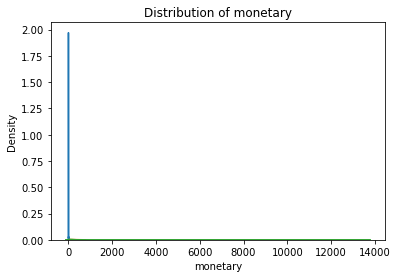

In [438]:
check_skew(final_RFM, 'frequency')
check_skew(final_RFM, 'recency')
check_skew(final_RFM, 'monetary')


Don't forget to normalize this data 
https://medium.com/web-mining-is688-spring-2021/using-k-means-to-segment-customers-based-on-rfm-variables-9d4d683688c8

## **K-Means clustering** 

### Scaling the Data

In [ ]:
df

ct = ColumnTransformer(transformers=[('num', MinMaxScaler(), df)]) #exclude the customer_id

# Create a pipeline with the ColumnTransformer
range_pipeline = Pipeline(steps=[('transformer', ct)])

# Fit the pipeline on the data
cw_range = range_pipeline.fit_transform(cityweather)

# **DEALING WTIH NEW_DF**

In [284]:
sampled_data = pd.read_csv('sampled_data.csv')


In [285]:
sampled_data['review_comment_message.y'].fillna("comentários", inplace=True)

# Print the updated DataFrame



In [286]:
sampled_data.head

<bound method NDFrame.head of       Unnamed: 0 order_status                     customer_id.x   price  \
0              1    delivered  e61fe87b0864704d29fd5915b7387215   99.90   
1              2    delivered  074449d94197a408f2ff3bdd985a20fb  169.99   
2              3    delivered  c707ba7bcdb0d504e6f30943e310e74e   89.99   
3              4    delivered  dafdad1b3be4401d27d372226043843f  269.00   
4              5    delivered  4a2b17a3baacbb0006395fff389d4738   25.90   
...          ...          ...                               ...     ...   
4995        4996    delivered  cb4f601a5eebf94e41b2bfc80cbc8e62   95.90   
4996        4997    delivered  6b86bf7b0271bb85a4c6ce7f1d0370b1   92.00   
4997        4998    delivered  cbc8bda19960ddbaa52c958ed055b4ad  124.90   
4998        4999    delivered  8c621aabf41f259e0324513337058477   38.90   
4999        5000    delivered  a78a3b844bcdc775fcea2bc88b41f787   49.99   

      freight_value  payment_installments.x  review_score.x  \
0     

In [287]:
swords = set().union(stopwords.words('portuguese'))


sampled_data.drop_duplicates(subset='review_comment_message.y',inplace=True)
sampled_data = sampled_data[sampled_data['review_comment_message.y'].notnull()]
sampled_data.shape



sampled_data['processed_text'] = sampled_data['review_comment_message.y'].str.lower()


sampled_data['processed_text'] = sampled_data['review_comment_message.y'].str.replace('(@[a-z0-9]+)\w+',' ')
sampled_data['processed_text'] = sampled_data['review_comment_message.y'].str.replace('(http\S+)', ' ')
sampled_data['processed_text'] = sampled_data['review_comment_message.y'].str.replace('([^0-9a-z \t])',' ')
sampled_data['processed_text'] = sampled_data['review_comment_message.y'].str.replace(' +',' ')
sampled_data['processed_text'] = sampled_data['processed_text'].str.replace('/', ' ')  # Remove slashes
sampled_data['processed_text'] = sampled_data['processed_text'].str.replace('.', ' ')  # Remove dots
sampled_data['processed_text'] = sampled_data['processed_text'].str.replace('\\', ' ')



sampled_data['processed_text'] = sampled_data['processed_text'].apply(lambda x: [i for i in x.split() if not i in swords])



sampled_data

/var/folders/h2/ldzmdwfn22q_73r1s_6dw5900000gn/T/ipykernel_40437/1177993609.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  sampled_data['processed_text'] = sampled_data['review_comment_message.y'].str.replace('(@[a-z0-9]+)\w+',' ')
/var/folders/h2/ldzmdwfn22q_73r1s_6dw5900000gn/T/ipykernel_40437/1177993609.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  sampled_data['processed_text'] = sampled_data['review_comment_message.y'].str.replace('(http\S+)', ' ')
/var/folders/h2/ldzmdwfn22q_73r1s_6dw5900000gn/T/ipykernel_40437/1177993609.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  sampled_data['processed_text'] = sampled_data['review_comment_message.y'].str.replace('([^0-9a-z \t])',' ')
/var/folders/h2/ldzmdwfn22q_73r1s_6dw5900000gn/T/ipykernel_40437/1177993609.py:16: FutureWarning: The default value of regex will change from 

,Unnamed: 0,order_status,customer_id.x,price,freight_value,payment_installments.x,review_score.x,product_name_lenght,recency.y,frequency.y,monetary.y,product_photos_qty,product_description_lenght,review_comment_message.y,processed_text
0,1,delivered,e61fe87b0864704d29fd5915b7387215,99.90,20.19,6,5,41,478,1,120.09,2,258,Mais uma vez a lannister.com se superou e entr...,"[Mais, vez, lannister, superou, entregou, prod..."
1,2,delivered,074449d94197a408f2ff3bdd985a20fb,169.99,28.14,1,4,41,75,1,198.13,1,971,comentários,[comentários]
4,5,delivered,4a2b17a3baacbb0006395fff389d4738,25.90,12.69,1,4,33,228,1,38.59,1,215,Qualidade baixa mas serve para o que eu precis...,"[Qualidade, baixa, serve, precisava, O, tecido..."
5,6,delivered,b31e07b7f3a2cd0c8172ee7947e7589d,17.49,16.79,3,5,23,242,1,34.28,1,879,foi uma compra muito boa e a entrega me surpre...,"[compra, boa, entrega, surpreendeu, satisfeita..."
9,10,delivered,ca2a96ff2aed6f4b5aeb7c112f9e4c18,74.59,20.94,1,4,60,84,1,95.53,1,614,Satisfeito com entrega e qualidade do produto,"[Satisfeito, entrega, qualidade, produto]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4977,4978,delivered,f7094a02fa3e369765c0c35f09c6eb5d,99.90,38.97,2,5,60,68,1,138.87,3,1344,"Amei meu produto, o prazo de entrega escelente...","[Amei, produto,, prazo, entrega, escelente,, v..."
4985,4986,delivered,1327ce0ab1e8ef67113da7aa01967f7b,199.00,10.21,2,1,40,276,1,209.21,1,234,a cor do produto no site é diferente do produt...,"[cor, produto, site, diferente, produto, receb..."
4986,4987,delivered,06edd9c4cdea63ce94873634698606db,39.90,8.88,1,4,40,166,1,48.78,1,130,O produto veio com partes erradas... no caso a...,"[O, produto, veio, partes, erradas, caso, boli..."
4988,4989,delivered,de4c540fcac301e3bf0dd6a9ffcfaa8a,52.99,14.45,3,5,41,133,1,134.88,1,1178,Produto entregue muito rápido.,"[Produto, entregue, rápido]"


In [288]:
for i in sampled_data['processed_text'][::2]:
    i.append("comentários")
    
sampled_data.head()

,Unnamed: 0,order_status,customer_id.x,price,freight_value,payment_installments.x,review_score.x,product_name_lenght,recency.y,frequency.y,monetary.y,product_photos_qty,product_description_lenght,review_comment_message.y,processed_text
0,1,delivered,e61fe87b0864704d29fd5915b7387215,99.90,20.19,6,5,41,478,1,120.09,2,258,Mais uma vez a lannister.com se superou e entr...,"[Mais, vez, lannister, superou, entregou, prod..."
1,2,delivered,074449d94197a408f2ff3bdd985a20fb,169.99,28.14,1,4,41,75,1,198.13,1,971,comentários,[comentários]
4,5,delivered,4a2b17a3baacbb0006395fff389d4738,25.90,12.69,1,4,33,228,1,38.59,1,215,Qualidade baixa mas serve para o que eu precis...,"[Qualidade, baixa, serve, precisava, O, tecido..."
5,6,delivered,b31e07b7f3a2cd0c8172ee7947e7589d,17.49,16.79,3,5,23,242,1,34.28,1,879,foi uma compra muito boa e a entrega me surpre...,"[compra, boa, entrega, surpreendeu, satisfeita..."
9,10,delivered,ca2a96ff2aed6f4b5aeb7c112f9e4c18,74.59,20.94,1,4,60,84,1,95.53,1,614,Satisfeito com entrega e qualidade do produto,"[Satisfeito, entrega, qualidade, produto, come..."


In [379]:


test = pd.DataFrame(
sampled_data)

test


,Unnamed: 0,order_status,customer_id.x,price,freight_value,payment_installments.x,review_score.x,product_name_lenght,recency.y,frequency.y,monetary.y,product_photos_qty,product_description_lenght,review_comment_message.y,processed_text,translated,sentiment_score,translated2
0,1,delivered,e61fe87b0864704d29fd5915b7387215,99.90,20.19,6,5,41,478,1,120.09,2,258,Mais uma vez a lannister.com se superou e entr...,"[Mais, vez, lannister, superou, entregou, prod...","['More', 'turn', 'Lannister', 'overcame', 'del...",0.0,"[More, turn, Lannister, overcame, delivered, p..."
1,2,delivered,074449d94197a408f2ff3bdd985a20fb,169.99,28.14,1,4,41,75,1,198.13,1,971,comentários,[comentários],['comments'],0.0,[comments]
4,5,delivered,4a2b17a3baacbb0006395fff389d4738,25.90,12.69,1,4,33,228,1,38.59,1,215,Qualidade baixa mas serve para o que eu precis...,"[Qualidade, baixa, serve, precisava, O, tecido...","['Quality', 'low', 'it suits', 'needed', 'O', ...",0.0,"[Quality, low, it suits, needed, O, tissue, ok..."
5,6,delivered,b31e07b7f3a2cd0c8172ee7947e7589d,17.49,16.79,3,5,23,242,1,34.28,1,879,foi uma compra muito boa e a entrega me surpre...,"[compra, boa, entrega, surpreendeu, satisfeita...","['purchase', 'good', 'delivery', 'surprised', ...",0.0,"[purchase, good, delivery, surprised, satisfie..."
9,10,delivered,ca2a96ff2aed6f4b5aeb7c112f9e4c18,74.59,20.94,1,4,60,84,1,95.53,1,614,Satisfeito com entrega e qualidade do produto,"[Satisfeito, entrega, qualidade, produto, come...","['Satisfied', 'delivery', 'quality', 'product'...",0.0,"[Satisfied, delivery, quality, product, comments]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4977,4978,delivered,f7094a02fa3e369765c0c35f09c6eb5d,99.90,38.97,2,5,60,68,1,138.87,3,1344,"Amei meu produto, o prazo de entrega escelente...","[Amei, produto,, prazo, entrega, escelente,, v...","['I loved', 'product,', 'term', 'delivery', 'e...",0.0,"[I loved, product,, term, delivery, excellent,..."
4985,4986,delivered,1327ce0ab1e8ef67113da7aa01967f7b,199.00,10.21,2,1,40,276,1,209.21,1,234,a cor do produto no site é diferente do produt...,"[cor, produto, site, diferente, produto, receb...","['color', 'product', 'site', 'different', 'pro...",0.0,"[color, product, site, different, product, rec..."
4986,4987,delivered,06edd9c4cdea63ce94873634698606db,39.90,8.88,1,4,40,166,1,48.78,1,130,O produto veio com partes erradas... no caso a...,"[O, produto, veio, partes, erradas, caso, boli...","['O', 'product', 'he came', 'parts', 'wrong', ...",0.0,"[O, product, he came, parts, wrong, case, marb..."
4988,4989,delivered,de4c540fcac301e3bf0dd6a9ffcfaa8a,52.99,14.45,3,5,41,133,1,134.88,1,1178,Produto entregue muito rápido.,"[Produto, entregue, rápido]","['Product', 'delivered', 'fast']",0.0,"[Product, delivered, fast]"


In [381]:
sampled_data.head()

,Unnamed: 0,order_status,customer_id.x,price,freight_value,payment_installments.x,review_score.x,product_name_lenght,recency.y,frequency.y,monetary.y,product_photos_qty,product_description_lenght,review_comment_message.y,processed_text,translated,sentiment_score,translated2
0,1,delivered,e61fe87b0864704d29fd5915b7387215,99.90,20.19,6,5,41,478,1,120.09,2,258,Mais uma vez a lannister.com se superou e entr...,"[Mais, vez, lannister, superou, entregou, prod...","['More', 'turn', 'Lannister', 'overcame', 'del...",0.0,"[More, turn, Lannister, overcame, delivered, p..."
1,2,delivered,074449d94197a408f2ff3bdd985a20fb,169.99,28.14,1,4,41,75,1,198.13,1,971,comentários,[comentários],['comments'],0.0,[comments]
4,5,delivered,4a2b17a3baacbb0006395fff389d4738,25.90,12.69,1,4,33,228,1,38.59,1,215,Qualidade baixa mas serve para o que eu precis...,"[Qualidade, baixa, serve, precisava, O, tecido...","['Quality', 'low', 'it suits', 'needed', 'O', ...",0.0,"[Quality, low, it suits, needed, O, tissue, ok..."
5,6,delivered,b31e07b7f3a2cd0c8172ee7947e7589d,17.49,16.79,3,5,23,242,1,34.28,1,879,foi uma compra muito boa e a entrega me surpre...,"[compra, boa, entrega, surpreendeu, satisfeita...","['purchase', 'good', 'delivery', 'surprised', ...",0.0,"[purchase, good, delivery, surprised, satisfie..."
9,10,delivered,ca2a96ff2aed6f4b5aeb7c112f9e4c18,74.59,20.94,1,4,60,84,1,95.53,1,614,Satisfeito com entrega e qualidade do produto,"[Satisfeito, entrega, qualidade, produto, come...","['Satisfied', 'delivery', 'quality', 'product'...",0.0,"[Satisfied, delivery, quality, product, comments]"


In [351]:
# Define a function to replace empty lists with "NO COMMENT"
def translate(arr):
    translated_list = []
    for text in arr:
        translated_text = GoogleTranslator('pt', 'en').translate_batch([text])
        translated_list.append(translated_text[0])

    return translated_list

# Apply the function to the 'processed_text' column
sampled_data['translated2'] = sampled_data['processed_text'].apply(translate)
#Apply the function to the 'processed_text' column


In [382]:
sampled_data

sampled_data.to_csv('sampled_data.csv', index=False)

In [399]:
sampled_data_copy = sampled_data.copy()
filter(None, sampled_data_copy)



In [395]:
sampled_data_copy.iloc[7]

Unnamed: 0                                                  16
order_status                                         delivered
customer_id.x                 32b6e75467a383fecae5655d01dfd92a
price                                                    388.9
freight_value                                            42.06
payment_installments.x                                      10
review_score.x                                               5
product_name_lenght                                         60
recency.y                                                  112
frequency.y                                                  1
monetary.y                                              430.96
product_photos_qty                                           7
product_description_lenght                                1353
review_comment_message.y                                 ótimo
processed_text                                         [ótimo]
translated                                       ['exce

In [401]:
sia = vd.SentimentIntensityAnalyzer()
from nltk.tokenize import word_tokenize

sampled_data_copy = sampled_data.dropna(subset=['translated2'])

sampled_data_copy['sentiment_score'] = sampled_data_copy['translated2'].apply(lambda x: sum([sia.polarity_scores(i)['compound'] for i in word_tokenize( ' '.join(x) )]) )
sampled_data_copy[['translated2','sentiment_score']].head(n=10)
sampled_data_copy['sentiment_score2'].apply(lambda x: round(x,)).value_counts()

# Assuming 'sampled_data' is your DataFrame

# Calculate the sum of all the values in the 'sentiment_score' column
total_sentiment_score = sampled_data_copy['sentiment_score'].sum()

# Print the sum
print(total_sentiment_score)

TypeError: sequence item 7: expected str instance, NoneType found

In [412]:
 type(sampled_data.iloc[6])

pandas.core.series.Series

In [409]:
sampled_data_copy['translated2'] = sampled_data_copy['translated2'].apply(lambda x: "nothing to translate here" if 'comments' in str(x).lower() else x)


In [352]:


sampled_data.head()


,Unnamed: 0,order_status,customer_id.x,price,freight_value,payment_installments.x,review_score.x,product_name_lenght,recency.y,frequency.y,monetary.y,product_photos_qty,product_description_lenght,review_comment_message.y,processed_text,translated,sentiment_score,translated2
0,1,delivered,e61fe87b0864704d29fd5915b7387215,99.90,20.19,6,5,41,478,1,120.09,2,258,Mais uma vez a lannister.com se superou e entr...,"[Mais, vez, lannister, superou, entregou, prod...","['More', 'turn', 'Lannister', 'overcame', 'del...",0.0,"[More, turn, Lannister, overcame, delivered, p..."
1,2,delivered,074449d94197a408f2ff3bdd985a20fb,169.99,28.14,1,4,41,75,1,198.13,1,971,comentários,[comentários],['comments'],0.0,[comments]
4,5,delivered,4a2b17a3baacbb0006395fff389d4738,25.90,12.69,1,4,33,228,1,38.59,1,215,Qualidade baixa mas serve para o que eu precis...,"[Qualidade, baixa, serve, precisava, O, tecido...","['Quality', 'low', 'it suits', 'needed', 'O', ...",0.0,"[Quality, low, it suits, needed, O, tissue, ok..."
5,6,delivered,b31e07b7f3a2cd0c8172ee7947e7589d,17.49,16.79,3,5,23,242,1,34.28,1,879,foi uma compra muito boa e a entrega me surpre...,"[compra, boa, entrega, surpreendeu, satisfeita...","['purchase', 'good', 'delivery', 'surprised', ...",0.0,"[purchase, good, delivery, surprised, satisfie..."
9,10,delivered,ca2a96ff2aed6f4b5aeb7c112f9e4c18,74.59,20.94,1,4,60,84,1,95.53,1,614,Satisfeito com entrega e qualidade do produto,"[Satisfeito, entrega, qualidade, produto, come...","['Satisfied', 'delivery', 'quality', 'product'...",0.0,"[Satisfied, delivery, quality, product, comments]"


In [358]:
geo_merged_df = pd.read_csv('geo_merged_df.csv')

geo_merged_df

,Unnamed: 0,customer_id,price,payment_installments,recency,monetary,cluster_no,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,1,000598caf2ef4117407665ac33275130,1107.00,10,22,1255.71,4,7e0516b486e92ed3f3afdd6d1276cfbd,35540,oliveira,MG
1,2,00072d033fe2e59061ae5c3aff1a2be5,89.90,1,366,106.97,5,b7c13491fd2aecd9308c75bb4de979d8,45026,vitoria da conquista,BA
2,3,00104a47c29da701ce41ee52077587d9,83.99,3,231,100.34,6,655f4f1277487bf6c86c673de5e576a1,38400,uberlandia,MG
3,4,00155f0530cc7b2bf73cc3f81cb01c52,28.90,4,476,40.75,1,533b3a42bf5005c302539e093b445d3d,13042,campinas,SP
4,5,001f35d9f262c558fd065346fbf5801d,28.90,1,220,46.53,6,ed5340f0e2a52fffa065298aeb875e60,21011,rio de janeiro,RJ
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,ffe1eab23bff108bf37c973b05d4e9ba,79.99,9,16,98.65,4,6fa76b0d56f88c4685b9e12f1d8a4220,97670,sao borja,RS
9996,9997,ffeaa6d37b3691d54a01171f6562f44f,29.50,1,242,47.42,6,1c627eb230da69b6aac42e5cc550578f,23970,paraty,RJ
9997,9998,fff1da51c6d3b52986925d7bcd8a6d30,13.90,1,470,30.69,1,b302429b41cf3e601313a193da0f6a97,22745,rio de janeiro,RJ
9998,9999,fff93c1da78dafaaa304ff032abc6205,69.45,10,82,242.48,4,d8dc373219d0f95053c8d65df85a7f1c,14802,araraquara,SP


In [357]:
# Making dictionaries to mapp zip code prefix and coordinates to the customers
dict_cust_zip = customer_data.set_index('customer_id').to_dict()['customer_zip_code_prefix']
dict_lat = geolocation.set_index('geolocation_zip_code_prefix').to_dict()['geolocation_lat']
dict_lng = geolocation.set_index('geolocation_zip_code_prefix').to_dict()['geolocation_lng']

In [364]:
dict_colors = {
    1: 'midnightblue',
    2: 'blue',
    3: 'mediumslateblue',
    4: 'darkorchid',
    5: 'magenta',
    6: 'deeppink'
    }
geo_merged_df ['geolocation_lat']\
    = geo_merged_df['customer_zip_code_prefix'].map(dict_lat)
geo_merged_df ['geolocation_lng']\
    = geo_merged_df['customer_zip_code_prefix'].map(dict_lng)
geo_merged_df['color']\
    = geo_merged_df['cluster_no'].map(dict_colors)


In [365]:
geo_merged_df 



,Unnamed: 0,customer_id,price,payment_installments,recency,monetary,cluster_no,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,color
0,1,000598caf2ef4117407665ac33275130,1107.00,10,22,1255.71,4,7e0516b486e92ed3f3afdd6d1276cfbd,35540,oliveira,MG,-20.701594,-44.818235,darkorchid
1,2,00072d033fe2e59061ae5c3aff1a2be5,89.90,1,366,106.97,5,b7c13491fd2aecd9308c75bb4de979d8,45026,vitoria da conquista,BA,-14.882719,-40.834339,magenta
2,3,00104a47c29da701ce41ee52077587d9,83.99,3,231,100.34,6,655f4f1277487bf6c86c673de5e576a1,38400,uberlandia,MG,-18.920965,-48.297735,deeppink
3,4,00155f0530cc7b2bf73cc3f81cb01c52,28.90,4,476,40.75,1,533b3a42bf5005c302539e093b445d3d,13042,campinas,SP,-22.927032,-47.049042,midnightblue
4,5,001f35d9f262c558fd065346fbf5801d,28.90,1,220,46.53,6,ed5340f0e2a52fffa065298aeb875e60,21011,rio de janeiro,RJ,-22.821334,-43.271690,deeppink
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,ffe1eab23bff108bf37c973b05d4e9ba,79.99,9,16,98.65,4,6fa76b0d56f88c4685b9e12f1d8a4220,97670,sao borja,RS,-28.655533,-56.000254,darkorchid
9996,9997,ffeaa6d37b3691d54a01171f6562f44f,29.50,1,242,47.42,6,1c627eb230da69b6aac42e5cc550578f,23970,paraty,RJ,-23.224075,-44.717856,deeppink
9997,9998,fff1da51c6d3b52986925d7bcd8a6d30,13.90,1,470,30.69,1,b302429b41cf3e601313a193da0f6a97,22745,rio de janeiro,RJ,-22.936264,-43.337709,midnightblue
9998,9999,fff93c1da78dafaaa304ff032abc6205,69.45,10,82,242.48,4,d8dc373219d0f95053c8d65df85a7f1c,14802,araraquara,SP,-21.763230,-48.182883,darkorchid


In [366]:
sample_subsegments = geo_merged_df.groupby(
    'customer_zip_code_prefix',
    as_index=False
    ).agg({
        'geolocation_lat': 'first',
        'geolocation_lng': 'first',
        'color': lambda x:x.value_counts().index[0]
        }).sample(n=200)

In [371]:
!pip install folium


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 2.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: pip install --upgrade pip


In [374]:
import folium
from folium.plugins import MarkerCluster

map_data = geo_merged_df.dropna(subset=['geolocation_lat', 'geolocation_lng'])

# Step 2: Create a map centered on Brazil
map_brazil = folium.Map(location=[-14, -52.5], zoom_start=5)

# Step 3: Create a MarkerCluster for the points
marker_cluster = MarkerCluster().add_to(map_brazil)

# Step 4: Add the points to the map
for index, row in map_data.iterrows():
    lat = row['geolocation_lat']
    lng = row['geolocation_lng']
    cluster_no = row['cluster_no']

    # Create a marker for each point and add it to the cluster
    popup_text = f"Cluster No.: {cluster_no}"
    folium.Marker([lat, lng], popup=popup_text).add_to(marker_cluster)

# Step 5: Display the map
map_brazil.save('brazil_map_with_clusters.html')


In [375]:


# Step 3: Create a map centered on Brazil
map_brazil = folium.Map(location=[-14, -52.5], zoom_start=5)

# Step 4: Create separate MarkerClusters for each cluster and add them to the map
for cluster_no, cluster_data in map_data.groupby('cluster_no'):
    marker_cluster = MarkerCluster(name=f'Cluster {cluster_no}').add_to(map_brazil)

    # Add the points to the MarkerCluster with corresponding cluster color
    for index, row in cluster_data.iterrows():
        lat = row['geolocation_lat']
        lng = row['geolocation_lng']
        cluster_no = row['cluster_no']

        # Create a marker for each point and add it to the cluster with the corresponding cluster color
        popup_text = f"Cluster No.: {cluster_no}"
        folium.Marker([lat, lng], popup=popup_text,
                      icon=folium.Icon(color=f"cluster_{cluster_no}", icon='circle')).add_to(marker_cluster)

# Step 5: Add a LayerControl to toggle between different clusters on the map
folium.LayerControl().add_to(map_brazil)

# Step 6: Display the map
map_brazil.save('brazil_map_with_clusters.html')


/var/folders/h2/ldzmdwfn22q_73r1s_6dw5900000gn/T/ipykernel_40437/940710624.py:19: UserWarning: color argument of Icon should be one of: {'darkgreen', 'lightblue', 'lightred', 'darkpurple', 'orange', 'cadetblue', 'white', 'lightgray', 'purple', 'darkblue', 'lightgreen', 'beige', 'green', 'black', 'red', 'blue', 'gray', 'pink', 'darkred'}.
  icon=folium.Icon(color=f"cluster_{cluster_no}", icon='circle')).add_to(marker_cluster)


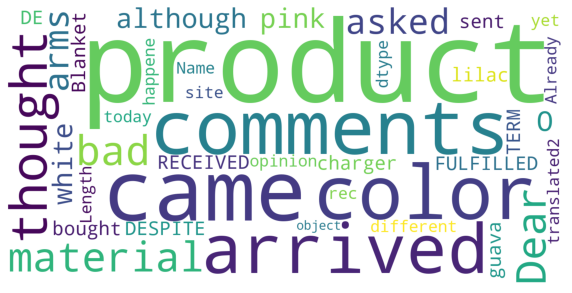

In [431]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

sampled_data2 = sampled_data[sampled_data['translated2'] != "comments"]

# Create a new dataframe 'positive' with review scores >= 3
positive = sampled_data2[sampled_data2['review_score.x'] >= 3]

# Create a new dataframe 'negative' with review scores < 3
negative = sampled_data2[sampled_data2['review_score.x'] < 3]

wc = WordCloud(background_color = 'white', width = 1500, height = 750).generate(str(negative['translated2']))
plt.title('', fontsize = 8)

plt.imshow(wc)
plt.axis('off')
plt.show()